<a href="https://colab.research.google.com/github/nikhilcms/Find-Image-Resolution-using-CNN-Regressor/blob/master/circle_cdetection_and_xyreading_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 43 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,467 kB/s)
debconf: unable to initi

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=699c0f3d84cf889a66904012515341a348b6f1cb68fb004d7f8841b59313df44
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/datasets")

In [ ]:
import os
import cv2
#import Utils
import numpy as np
from PIL import Image
#import pytesseract
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [50,9]

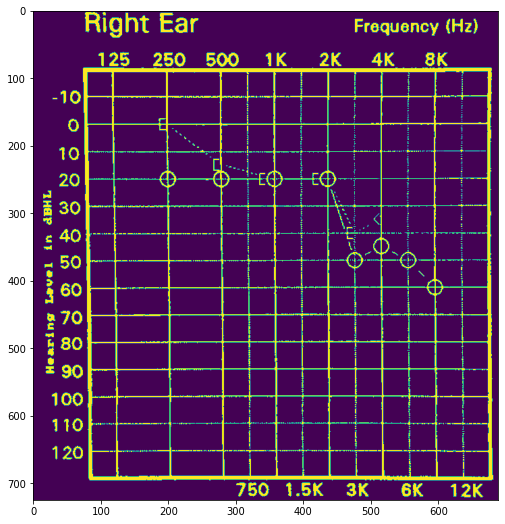

In [ ]:
#=======================input image=====================#
image = cv2.imread("Attachment_1592070273.jpeg",0)
thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

In [ ]:
#======================detect lines====================#
def detect_Lines(image):
    df_list = []
    im = image.copy()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    plt.imshow(thresh)
    dil_kernel = np.ones((2,2), np.uint8)
#     erode_im = cv2.erode(thresh, dil_kernel, iterations=1)
#     Utils.display_image(erode_im)
#     dil_kernel = np.ones((5,5), np.uint8)
    dil_im = cv2.dilate(thresh, dil_kernel, iterations=2)
    plt.imshow(dil_im)
    
    # Detect horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
    detect_horizontal = cv2.morphologyEx(dil_im, cv2.MORPH_OPEN, horizontal_kernel, iterations=3)
    cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        temp_dict = {}
        temp_dict['TYPE'] = "horizontal"
        temp_dict['HPOS'] = min(c[:,:,0])[0]
        temp_dict['HPOS_END'] = max(c[:,:,0])[0]
        temp_dict['VPOS'] = min(c[:,:,1])[0]
        temp_dict['VPOS_DOWN'] = max(c[:,:,1])[0]
        df_list.append(temp_dict)
        cv2.drawContours(im, [c], -1, (36,255,12), 2)
        plt.imshow(im)
    
    # Detect vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
    detect_vertical = cv2.morphologyEx(dil_im, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        temp_dict = {}
        temp_dict['TYPE'] = "vertical"
        temp_dict['HPOS'] = min(c[:,:,0])[0]
        temp_dict['HPOS_END'] = max(c[:,:,0])[0]
        temp_dict['VPOS'] = min(c[:,:,1])[0]
        temp_dict['VPOS_DOWN'] = max(c[:,:,1])[0]
        df_list.append(temp_dict)
        cv2.drawContours(im, [c], -1, (36,255,12), 1)
        plt.imshow(im)
    return pd.DataFrame(df_list)

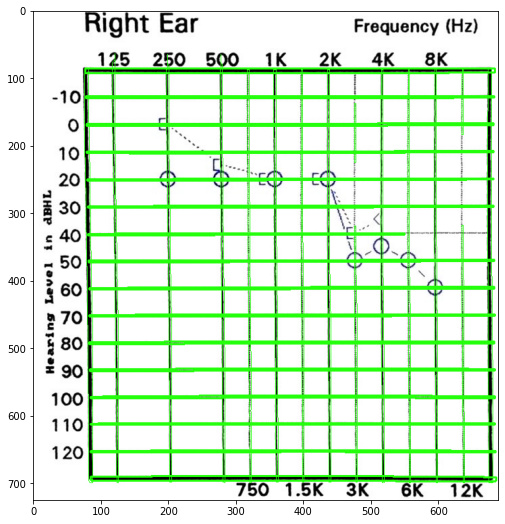

In [ ]:
image_1 = cv2.imread("Attachment_1592070273.jpeg")
grid_coordinate = detect_Lines(image_1)

In [ ]:
horizontal_line_start = grid_coordinate[grid_coordinate['TYPE']=='horizontal']['HPOS'].min()
horizontal_line_end = grid_coordinate[grid_coordinate['TYPE']=='horizontal']['HPOS_END'].max()
vertical_line_start = grid_coordinate[grid_coordinate['TYPE']=='horizontal']['VPOS'].min()
vertical_line_end = grid_coordinate[grid_coordinate['TYPE']=='horizontal']['VPOS_DOWN'].max()

In [ ]:
print('horizontal_line_start',horizontal_line_start)
print('horizontal_line_end',horizontal_line_end)
print('vertical_line_start',vertical_line_start)
print('vertical_line_end',vertical_line_end)


horizontal_line_start 77
horizontal_line_end 686
vertical_line_start 86
vertical_line_end 697


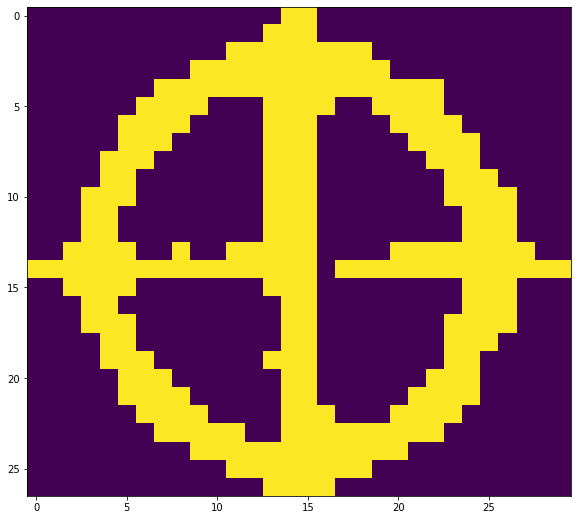

In [ ]:
#=====================crop shapes from graphs=============#
image = cv2.imread("Attachment_1592070273.jpeg",0)
thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
circle_template = thresh[236:263,185:215]    
rectangle_template = thresh[156:182,180:206]
plt.imshow(circle_template)

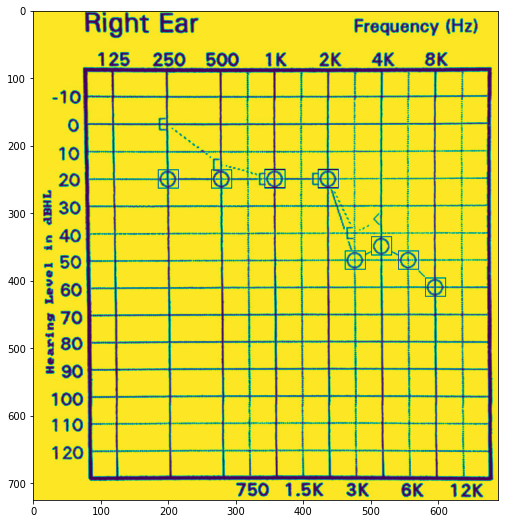

In [ ]:
import cv2
import numpy as np

# read image

template1 = circle_template.copy()
template2 = rectangle_template.copy()
def shape_detection(shapes,gray,image):
  all_shape = []
  xy_cord = []
  template = [shapes]
  for i in template:
    img = image.copy()
    gray = thresh.copy()
    res = cv2.matchTemplate(gray,i,cv2.TM_SQDIFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # create threshold from min val, find where sqdiff is less than thresh
    min_thresh = (min_val + 1e-6) * 1.5
    match_locations = np.where(res<=0.4)

    # draw template match boxes
    w, h = i.shape[::-1]
    for (x, y) in zip(match_locations[1], match_locations[0]):
      cv2.rectangle(img, (x, y),(x+w, y+h),[0,0,255],1)
      xy_cord.append([x,x+w,y,y+h])
      centre = [(x+(x+w))/2,(y+(y+h))/2]
      all_shape.append(centre)
  plt.imshow(img)
  return all_shape,xy_cord
centre,all_cordinate = shape_detection(template1,gray,image)         # here we input circle image and match where it present in graph store all coordinate and calcualet centre

In [ ]:
centre  # coordinate position

[[358.0, 248.5],
 [437.0, 248.5],
 [200.0, 249.5],
 [279.0, 249.5],
 [358.0, 249.5],
 [437.0, 249.5],
 [516.0, 348.5],
 [477.0, 369.5],
 [556.0, 369.5],
 [596.0, 409.5]]

In [ ]:
#=====================respective number of horizontal and vertical line label===============#
vertical_number = [-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120,130]
horizontal_number = [0,125,250,500,750,1000,1500,2000,3000,4000,6000,8000,12000,16000]

In [ ]:
#=================vertical line coordinate==============#
verical_coordinate = np.sort(list(grid_coordinate[grid_coordinate['TYPE']=='horizontal']['VPOS']))
verical_coordinate

array([ 86, 127, 167, 208, 249, 289, 330, 369, 409, 450, 490, 530, 570,
       611, 651, 689])

In [ ]:
#===============horizontal line coordiante===========#
horizontal_coordinate = np.sort(list(grid_coordinate[grid_coordinate['TYPE']=='vertical']['HPOS'].unique()))
horizontal_coordinate

array([ 76, 117, 197, 277, 317, 356, 397, 436, 476, 515, 555, 594, 635,
       673])

In [ ]:
#==============calculate circle x y label based on circle coordinate and line coordiante=============#
x_y_scale = []
for i in range(len(centre)):
  xmin = centre[i][0] ; ymin = centre[i][1]
  horizontal_index = [x for x,y in enumerate(horizontal_coordinate) if y in range(int(xmin-20),int(xmin+20))]
  vertical_index = [x for x,y in enumerate(verical_coordinate) if y in range(int(ymin-20),int(ymin+20))]
  #print(horizontal_index) ; print(vertical_index)
  horizontal_scale = horizontal_number[horizontal_index[0]]
  vertical_scale = vertical_number[vertical_index[0]]
  x_y_scale.append((vertical_scale,horizontal_scale))

In [ ]:
x_y_scale            # x-y label of circle

[(20, 1000),
 (20, 2000),
 (20, 250),
 (20, 500),
 (20, 1000),
 (20, 2000),
 (40, 4000),
 (50, 3000),
 (50, 6000),
 (60, 8000)]

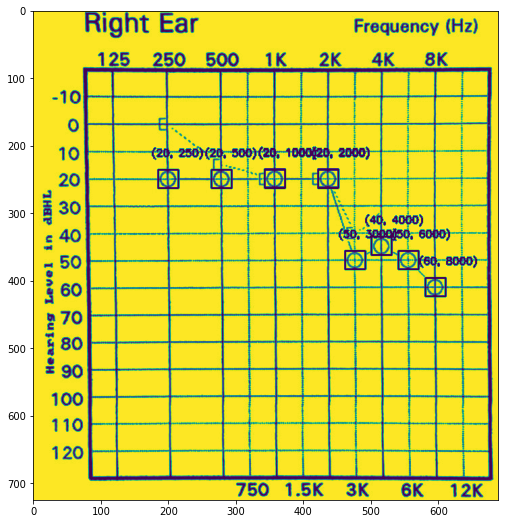

In [ ]:
#==========================final visualization=====================#
image_3 = cv2.imread("Attachment_1592070273.jpeg",0)
xy_cord = all_cordinate.copy()
for indx in range(len(xy_cord)):
  cordd = xy_cord[indx]
  label = str(x_y_scale[indx])
  cv2.rectangle(image_3,(cordd[0],cordd[2]),(cordd[1],cordd[3]),(0,255,0),2)
  cv2.putText(image_3,label,(cordd[0]-10, cordd[2]-15-5),
  cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
plt.imshow(image_3) 

In [ ]:
xy_cord

[[343, 373, 235, 262],
 [422, 452, 235, 262],
 [185, 215, 236, 263],
 [264, 294, 236, 263],
 [343, 373, 236, 263],
 [422, 452, 236, 263],
 [501, 531, 335, 362],
 [462, 492, 356, 383],
 [541, 571, 356, 383],
 [581, 611, 396, 423]]

In [ ]:
x_y_scale 

[(20, 1000),
 (20, 2000),
 (20, 250),
 (20, 500),
 (20, 1000),
 (20, 2000),
 (40, 4000),
 (50, 3000),
 (50, 6000),
 (60, 8000)]